# Carga de módulos para tratamiento de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vuelos = sns.load_dataset('flights')
vuelos

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [9]:
pivoteVuelos = vuelos.pivot(index='month', columns= 'year', values='passengers')

In [10]:
pivoteVuelos

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


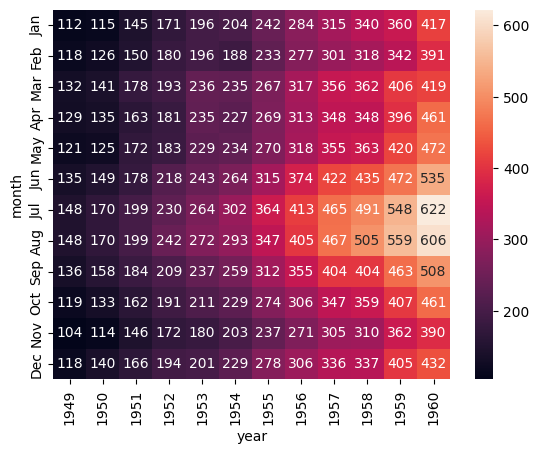

In [11]:
# sns.heatmap(datos, parametros)
mapa_calor = sns.heatmap(pivoteVuelos, annot=True, fmt='d')

## CARGA DE DATOS DESDE ARCHIVO

In [21]:
# desde pandas -> pd.read_tipo(ruta y nombre de archivo)
ruta_archivoX = 'EXCEL/datos.xlsx'
tabla = pd.read_excel(ruta_archivoX)
tabla

,Sexo,Peso,Talla,Edad
0,M,126,167,18
1,M,120,151,27
2,M,155,148,23
3,F,117,167,28
4,M,144,166,22
5,F,105,174,20
6,F,151,147,33
7,F,120,175,31
8,M,106,162,32
9,F,102,169,23


In [24]:
tabla2 = pd.read_csv('CSV/AAPL.csv')
tabla2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-02,109.110001,110.680000,107.320000,108.769997,107.780052,122866900
1,2020-11-03,109.660004,111.489998,108.730003,110.440002,109.434868,107624400
2,2020-11-04,114.139999,115.589996,112.349998,114.949997,113.903816,138235500
3,2020-11-05,117.949997,119.620003,116.870003,119.029999,117.946686,126387100
4,2020-11-06,118.320000,119.199997,116.129997,118.690002,117.812691,114457900
...,...,...,...,...,...,...,...
315,2022-02-02,174.750000,175.880005,173.330002,175.839996,175.616257,84914300
316,2022-02-03,174.479996,176.240005,172.119995,172.899994,172.679993,89418100
317,2022-02-04,171.679993,174.100006,170.679993,172.389999,172.389999,82391400
318,2022-02-07,172.860001,173.949997,170.949997,171.660004,171.660004,77251200


In [ ]:
## planilla = pd.read_csv(sep=',')

In [31]:
contingencia = pd.crosstab(tabla['Edad'], tabla['Sexo'])
contingencia 

Sexo,F,M
Edad,,
18,0,2
19,1,0
20,1,1
21,1,0
22,1,1
23,1,3
25,0,1
26,2,4
27,2,2


In [33]:
n = len(tabla)
intervalos = pd.cut(tabla['Edad'], bins=5)  ## bins = intervalos
frecuenciaGrupo = pd.crosstab(index=intervalos, columns='f')
tablaEdad = pd.DataFrame(frecuenciaGrupo.index)
tablaEdad['f']=frecuenciaGrupo.values
tablaEdad['fa']=tablaEdad['f'].cumsum()
tablaEdad['fr']=tablaEdad['f']/n
tablaEdad['fra']=tablaEdad['fr'].cumsum()
tablaEdad['%']=tablaEdad['fr']*100
tablaEdad['%a']=tablaEdad['fra']*100
tablaEdad

,Edad,f,fa,fr,fra,%,%a
0,"(17.983, 21.4]",6,6,0.15,0.15,15.0,15.0
1,"(21.4, 24.8]",6,12,0.15,0.30,15.0,30.0
2,"(24.8, 28.2]",14,26,0.35,0.65,35.0,65.0
3,"(28.2, 31.6]",6,32,0.15,0.80,15.0,80.0
4,"(31.6, 35.0]",8,40,0.20,1.00,20.0,100.0
